<a href="https://colab.research.google.com/github/Aigulka1979/My_repos/blob/main/DBSCAN_PCA_T-SNE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="markdown-google-sans">
  <h1>Добро пожаловать в Colab!</h1>
</div>

<div class="markdown-google-sans">
  <h2>&#40;Новое&#41; Попробуйте Gemini API</h2>
  <ul>
  <li><a href="https://makersuite.google.com/app/apikey">Generate a Gemini API key</a></li>
  <li><a href="https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/Talk_to_Gemini_with_Google%27s_Speech_to_Text_API.ipynb?utm_medium=link&utm_campaign=gemini">Talk to Gemini with the Speech-to-Text API</a></li>
  <li><a href="https://colab.research.google.com/github/google/generative-ai-docs/blob/main/site/en/tutorials/quickstart_colab.ipynb?utm_medium=link&utm_campaign=gemini">Gemini API: Quickstart with Python</a></li>
  <li><a href="https://colab.research.google.com/notebooks/snippets/gemini.ipynb?utm_medium=link&utm_campaign=gemini">Gemini API code sample</a></li>
  <li><a href="https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/Learning_with_Gemini_and_ChatGPT.ipynb?utm_medium=link&utm_campaign=gemini">Compare Gemini with ChatGPT</a></li>  
  <li><a href="https://colab.google/notebooks/?utm_medium=link&utm_campaign=gemini">More notebooks</a></li>
  </ul>
</div>


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
df = pd.read_excel('/content/force2020_data_unsupervised_learning.xlsx')
df.head()

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
0,1.884185791,80.200851,494.528,NaN,20.915468,161.131180
1,1.8897935152,79.262886,494.680,NaN,19.383013,160.603470
2,1.8965227604,74.821999,494.832,NaN,22.591518,160.173615
3,1.891912818,72.878922,494.984,NaN,32.191910,160.149429
4,1.8800340891,71.729141,495.136,NaN,38.495632,160.128342


In [42]:
df.isna().count()


,0
RHOB,12202
GR,12202
DEPTH_MD,12202
NPHI,12202
PEF,12202
DTC,12202


In [44]:
df.fillna(0)

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
4238,1.7746260166,55.892757,1138.704,0.765867,1.631495,147.837677
4239,1.8009859324000002,60.929138,1138.856,0.800262,1.645080,142.382431
4240,1.8176960945,62.117264,1139.008,0.765957,1.645873,138.258331
4241,1.8293334246,61.010860,1139.160,0.702521,1.620216,139.198914
4242,1.8138538599,58.501236,1139.312,0.639708,1.504854,144.290085
...,...,...,...,...,...,...
16435,2.468236208,90.537521,2993.256,0.341534,4.699200,86.474564
16436,2.4575185776,88.819122,2993.408,0.351085,4.699200,86.187599
16437,2.4292283058,92.128922,2993.560,0.364982,4.699200,87.797836
16438,2.4254794121,95.870255,2993.712,0.367323,5.224292,88.108452


In [13]:
df.dropna(inplace=True)
df.describe()

,GR,DEPTH_MD,NPHI,PEF,DTC
count,12202.000000,12202.000000,12202.000000,12202.000000,12202.000000
mean,61.253852,2066.272839,0.414572,3.912313,121.409905
std,29.902708,535.691815,0.139207,1.816933,30.394369
min,6.191506,1138.704000,0.037976,1.126667,55.726753
25%,42.792794,1602.342000,0.313797,2.629141,89.977041
50%,62.886322,2065.980000,0.466891,3.365132,138.477173
75%,77.726776,2530.226000,0.513840,4.686422,146.242302
max,499.022583,2993.864000,0.800262,17.026619,163.910797


In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled=pd.DataFrame(df_scaled, columns=df.columns)
df_scaled

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
0,-1.491843,-0.179292,-1.731605,2.523654,-1.255364,0.869531
1,-1.387067,-0.010859,-1.731322,2.770744,-1.247886,0.690042
2,-1.320646,0.028875,-1.731038,2.524300,-1.247450,0.554350
3,-1.274390,-0.008126,-1.730754,2.068584,-1.261572,0.585297
4,-1.335919,-0.092056,-1.730470,1.617342,-1.325067,0.752808
...,...,...,...,...,...,...
12197,1.265151,0.979338,1.730512,-0.524699,0.433103,-1.149449
12198,1.222550,0.921870,1.730796,-0.456081,0.433103,-1.158891
12199,1.110101,1.032560,1.731080,-0.356250,0.433103,-1.105910
12200,1.095199,1.157682,1.731363,-0.339430,0.722114,-1.095690


In [36]:
df_scaled

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
0,-1.491843,-0.179292,-1.731605,2.523654,-1.255364,0.869531
1,-1.387067,-0.010859,-1.731322,2.770744,-1.247886,0.690042
2,-1.320646,0.028875,-1.731038,2.524300,-1.247450,0.554350
3,-1.274390,-0.008126,-1.730754,2.068584,-1.261572,0.585297
4,-1.335919,-0.092056,-1.730470,1.617342,-1.325067,0.752808
...,...,...,...,...,...,...
12197,1.265151,0.979338,1.730512,-0.524699,0.433103,-1.149449
12198,1.222550,0.921870,1.730796,-0.456081,0.433103,-1.158891
12199,1.110101,1.032560,1.731080,-0.356250,0.433103,-1.105910
12200,1.095199,1.157682,1.731363,-0.339430,0.722114,-1.095690


In [38]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)
df_pca
component_names = [f"PC{i+1}" for i in range(df_pca.shape[1])]
X_pca = pd.DataFrame(df_pca, columns=component_names)

X_pca


,PC1,PC2
0,3.400704,-0.528111
1,3.406955,-0.351787
2,3.196402,-0.298652
3,2.968971,-0.316358
4,2.866905,-0.389117
...,...,...
12197,-2.139448,1.458736
12198,-2.101619,1.397818
12199,-1.954093,1.463575
12200,-1.980253,1.469578


In [28]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(df_scaled)
clusters_labels = dbscan.labels_
clusters_labels

array([-1, -1, -1, ...,  5,  5,  5])

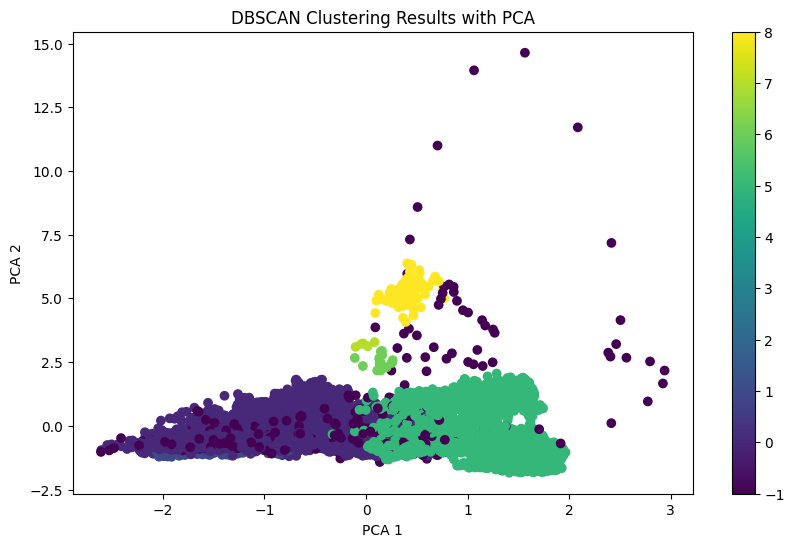

In [61]:
# Visualize the results
plt.figure(figsize=(10, 6))
# Access the columns by name or using .iloc[] for integer-based indexing
scatter = plt.scatter(df_scaled.iloc[:, 0], df_scaled.iloc[:, 1], c=clusters, cmap='viridis')
plt.colorbar(scatter)
plt.title('DBSCAN Clustering Results with PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

Уже знакомы с Colab? В этом видео рассказывается о функциях, которые вы могли пропустить: интерактивных таблицах, истории выполненного кода и палитре команд.

<center>
  <a href="https://www.youtube.com/watch?v=rNgswRZ2C1Y" target="_blank">
  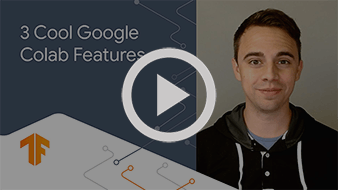
  </a>
</center>

In [60]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(df_scaled)
tsne.kl_divergence_

1.1371889114379883

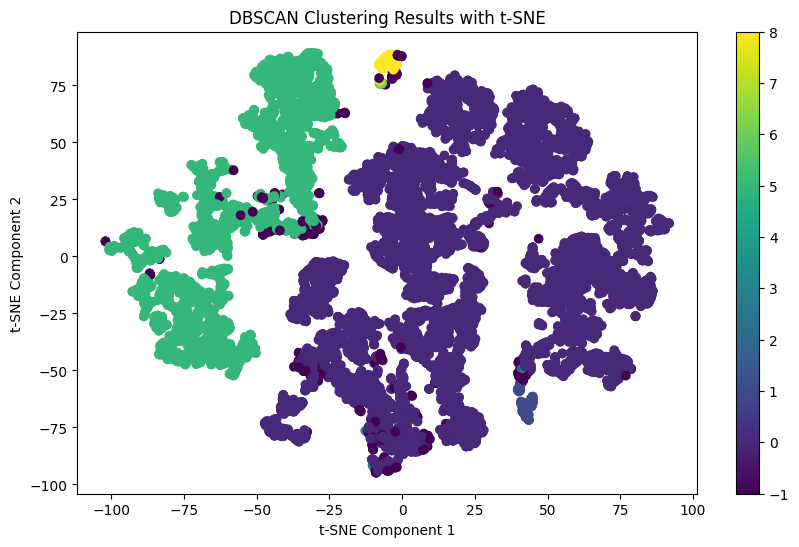

In [57]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(x=X_tsne[:, 0], y=X_tsne[:, 1], c=clusters, cmap='viridis')
plt.colorbar(scatter)
plt.title('DBSCAN Clustering Results with t-SNE')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

<div class="markdown-google-sans">
  <h2>Что такое Colab?</h2>
</div>

Colaboratory, или просто Colab, позволяет писать и выполнять код Python в браузере. При этом:
- не требуется никакой настройки;
- бесплатный доступ к графическим процессорам;
- предоставлять доступ к документам другим людям очень просто.

Это отличное решение для <strong>студентов</strong>, <strong>специалистов по обработке данных</strong> и <strong>исследователей в области искусственного интеллекта</strong>. Чтобы узнать больше, посмотрите <a href="https://www.youtube.com/watch?v=inN8seMm7UI">ознакомительное видео</a> или начните работу с инструментом ниже.

<div class="markdown-google-sans">

## <strong>Начало работы</strong>
</div>

Документ, который вы читаете, размещен не на статической веб-странице, а в интерактивной среде под названием <strong>блокнот Colab</strong>, позволяющей писать и выполнять код.

Например, вот <strong>ячейка</strong> с коротким скриптом Python, который позволяет рассчитать значение, выразить его в виде переменной и распечатать результат:

In [ ]:
seconds_in_a_day = 24 * 60 * 60
seconds_in_a_day

86400

Чтобы выполнить код в ячейке выше, выберите ее, а затем нажмите кнопку воспроизведения слева от кода или используйте сочетание клавиш Cmd/Ctrl + Ввод. Чтобы изменить код, достаточно нажать на ячейку.

Переменные, заданные в одной ячейке, можно будет использовать в других ячейках:

In [ ]:
seconds_in_a_week = 7 * seconds_in_a_day
seconds_in_a_week

604800

Благодаря блокнотам Colab вы можете использовать в одном документе <strong>исполняемый код</strong>, <strong>форматированный текст</strong>, <strong>изображения</strong>, <strong>разметку HTML</strong>, <strong>набор LaTeX</strong> и не только. Блокноты Colab будут храниться на вашем Google Диске. Вы сможете открыть к ним доступ коллегам или друзьям, разрешив им просматривать или даже редактировать документ, а также оставлять комментарии. Подробная информация доступна на <a href="/notebooks/basic_features_overview.ipynb">этой странице</a>. Чтобы создать блокнот Colab, можно воспользоваться меню "Файл" выше или <a href="http://colab.research.google.com#create=true">перейти по этой ссылке</a>.

Блокноты Colab – это блокноты Jupyter, которые размещены в сервисе Colab. Подробная информация о проекте Jupyter доступна на сайте <a href="https://www.jupyter.org">jupyter.org</a>.

<div class="markdown-google-sans">

## Анализ и обработка данных
</div>

Colab позволяет использовать для анализа и визуализации данных все возможности популярных библиотек Python. Например, в ячейке ниже используется библиотека <strong>numpy</strong> для генерации случайных данных, а также библиотека <strong>matplotlib</strong> для их визуализации. Чтобы изменить код, достаточно нажать на ячейку.

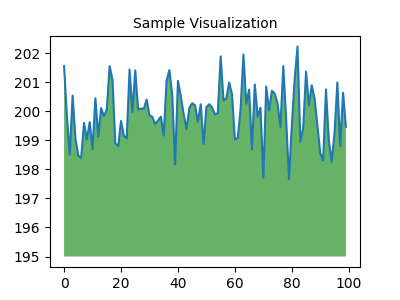

In [ ]:
import numpy as np
import IPython.display as display
from matplotlib import pyplot as plt
import io
import base64

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

fig = plt.figure(figsize=(4, 3), facecolor='w')
plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)
plt.title("Sample Visualization", fontsize=10)

data = io.BytesIO()
plt.savefig(data)
image = F"data:image/png;base64,{base64.b64encode(data.getvalue()).decode()}"
alt = "Sample Visualization"
display.display(display.Markdown(F"""![{alt}]({image})"""))
plt.close(fig)

Вы можете импортировать в блокноты Colab данные из своего аккаунта Google Диска, в том числе из таблиц, а также из GitHub и многих других источников. Чтобы узнать больше об импорте данных и о том, как можно использовать Colab для их анализа и обработки, изучите ссылки в разделе <a href="#working-with-data">Работа с данными</a>.

<div class="markdown-google-sans">

## Машинное обучение
</div>

В Colab вы можете импортировать набор данных изображения, сориентировать на него классификатор изображений и оценить модель с помощью <a href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb">нескольких строк кода</a>. Код в блокнотах Colab исполняется на облачных серверах Google. Это означает, что вы можете использовать аппаратное обеспечение Google, <a href="#using-accelerated-hardware">в том числе графические процессоры и TPU</a>, независимо от мощности вашей машины. Вам нужен только браузер.

Colab активно используется в области машинного обучения, в том числе для:
- знакомства с TensorFlow;
- разработки и обучения нейронных сетей;
- экспериментов с TPU;
- распространения исследований в области ИИ;
- создания руководств.

Примеры использования блокнотов Colab в сфере машинного обучения приведены в разделе <a href="#machine-learning-examples">Примеры использования в машинном обучении</a> ниже.

<div class="markdown-google-sans">

## Ресурсы по теме

### Работа с блокнотами в Colab

</div>

- [Общие сведения о Colaboratory](/notebooks/basic_features_overview.ipynb)
- [Руководство для Markdown](/notebooks/markdown_guide.ipynb)
- [Импорт библиотек и установка зависимостей](/notebooks/snippets/importing_libraries.ipynb)
- [Сохранение и загрузка блокнотов в GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/colab-github-demo.ipynb)
- [Интерактивные формы](/notebooks/forms.ipynb)
- [Интерактивные виджеты](/notebooks/widgets.ipynb)

<div class="markdown-google-sans">

<a name="working-with-data"></a>
### Работа с данными
</div>

- [Загрузка данных: Диск, Таблицы и Google Cloud Storage](/notebooks/io.ipynb)
- [Диаграмма: визуализация данных](/notebooks/charts.ipynb)
- [Начало работы с BigQuery](/notebooks/bigquery.ipynb)

<div class="markdown-google-sans">

### Экспресс-курс по машинному обучению

<div>

Вот несколько блокнотов из онлайн-курса по машинному обучению от Google. Ещё больше информации доступно на <a href="https://developers.google.com/machine-learning/crash-course/">сайте курса</a>.
- [Знакомство с Pandas DataFrame](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb)
- [Линейная регрессия в tf.keras с использованием синтетических данных](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/linear_regression_with_synthetic_data.ipynb)

<div class="markdown-google-sans">

<a name="using-accelerated-hardware"></a>
### Использование ускорителей
</div>

- [TensorFlow с графическими процессорами](/notebooks/gpu.ipynb)
- [TensorFlow с TPU](/notebooks/tpu.ipynb)

<div class="markdown-google-sans">

<a name="machine-learning-examples"></a>

### Примеры

</div>

- <a href="https://colab.research.google.com/github/NVIDIA/NeMo/blob/stable/tutorials/VoiceSwapSample.ipynb">NeMo Voice Swap</a>. Инструменты разговорного AI Nvidia NeMo позволяют использовать в аудиозаписи сгенерированный компьютером голос вместо человеческого.

- <a href="https://tensorflow.org/hub/tutorials/tf2_image_retraining">Обучение классификатора изображений</a>. Используя предварительно обученный классификатор изображений, создайте модель Keras для распознавания цветов.
- <a href="https://tensorflow.org/hub/tutorials/tf2_text_classification">Классификация текста</a>. Разделите отзывы на сайте IMDb на <em>положительные</em> и <em>отрицательные</em>.
- <a href="https://tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization">Перенос стиля</a>. Используйте модель глубокого обучения, чтобы переносить стиль с одного изображения на другое.
- <a href="https://tensorflow.org/hub/tutorials/retrieval_with_tf_hub_universal_encoder_qa">Вопросно-ответный универсальный многоязычный кодировщик</a>. Используйте модель машинного обучения, чтобы отвечать на вопросы из набора данных SQuAD.
- <a href="https://tensorflow.org/hub/tutorials/tweening_conv3d">Интерполяция видео.</a> Спрогнозируйте, что произошло между первым и последним кадрами видео.
